In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import load_iris 

iris = load_iris()
y = iris.target  # three class to be classified
x = iris.data    # four features vector as input


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [3]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units = 32, activation ='relu', input_shape =(4,)))
model.add(tf.keras.layers.Dense(units = 16, activation ='relu'))
model.add(tf.keras.layers.Dense(units = 8,  activation ='relu'))
model.add(tf.keras.layers.Dense(units = 4,  activation ='relu'))
model.add(tf.keras.layers.Dense(units = 3,  activation ='softmax'))


model.compile(  loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.RMSprop(),
                metrics = ['accuracy']
                )


history = model.fit(x_train, y_train, epochs =100, validation_split=0.2)



Epoch 1/100
3/3 [==============================] - 1s 65ms/step - loss: 1.1936 - accuracy: 0.3542 - val_loss: 1.2088 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 1.1143 - accuracy: 0.3542 - val_loss: 1.1186 - val_accuracy: 0.2917
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0707 - accuracy: 0.3542 - val_loss: 1.0748 - val_accuracy: 0.2917
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0491 - accuracy: 0.3542 - val_loss: 1.0534 - val_accuracy: 0.2917
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0326 - accuracy: 0.3542 - val_loss: 1.0245 - val_accuracy: 0.2917
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0221 - accuracy: 0.3542 - val_loss: 1.0142 - val_accuracy: 0.2917
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0122 - accuracy: 0.3542 - val_loss: 0.9922 - val_accuracy: 0.2917
Epoch 8/100
3/3 [====

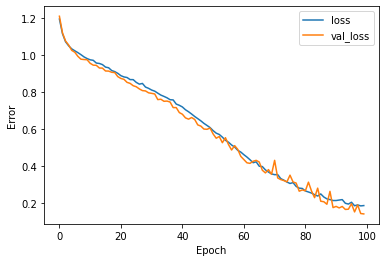

In [4]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show() 

In [5]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.17240901291370392
Test accuracy: 0.9666666388511658


In [6]:
(np.argmax(model.predict(x_test), axis =1) == y_test).mean()

1/1 [==============================] - 0s 78ms/step


0.9666666666666667

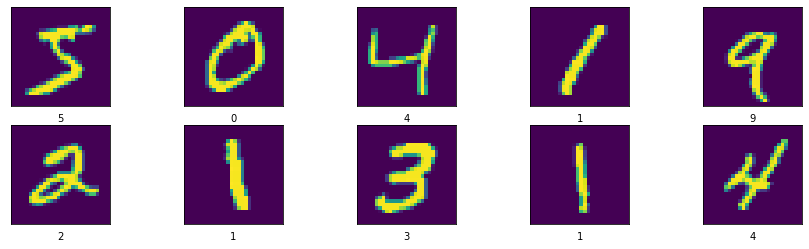

In [7]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

plt.figure(figsize=(15,4))

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])


x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
# let's train only 20000 data
x_train = x_train[0:20000]
y_train = y_train[0:20000]


# reducing test to 5000
x_test = x_test[0:5000]
y_test = y_test[0:5000]

In [9]:
model_mnist = tf.keras.Sequential()

model_mnist.add(tf.keras.Input(shape = (28,28)))
model_mnist.add(tf.keras.layers.Flatten())

model_mnist.add(tf.keras.layers.Dense(units = 128, activation ='relu'))
model_mnist.add(tf.keras.layers.Dropout(0.2))

model_mnist.add(tf.keras.layers.Dense(units = 64,  activation ='relu'))
model_mnist.add(tf.keras.layers.Dropout(0.2))

model_mnist.add(tf.keras.layers.Dense(units = 32,  activation ='relu'))
model_mnist.add(tf.keras.layers.Dropout(0.2))

model_mnist.add(tf.keras.layers.Dense(units = 16,  activation ='relu'))
model_mnist.add(tf.keras.layers.Dense(units = 10,  activation ='softmax'))


model_mnist.compile(
                    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['accuracy']
)

history = model_mnist.fit(x_train,y_train, epochs =50, validation_split=0.3, verbose=1)

Epoch 1/50
438/438 [==============================] - 1s 2ms/step - loss: 0.9736 - accuracy: 0.6926 - val_loss: 0.3468 - val_accuracy: 0.8997
Epoch 2/50
438/438 [==============================] - 1s 2ms/step - loss: 0.3882 - accuracy: 0.8907 - val_loss: 0.2371 - val_accuracy: 0.9275
Epoch 3/50
438/438 [==============================] - 1s 2ms/step - loss: 0.2846 - accuracy: 0.9209 - val_loss: 0.1952 - val_accuracy: 0.9418
Epoch 4/50
438/438 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9388 - val_loss: 0.1829 - val_accuracy: 0.9480
Epoch 5/50
438/438 [==============================] - 1s 2ms/step - loss: 0.1929 - accuracy: 0.9481 - val_loss: 0.1728 - val_accuracy: 0.9510
Epoch 6/50
438/438 [==============================] - 1s 2ms/step - loss: 0.1698 - accuracy: 0.9542 - val_loss: 0.1545 - val_accuracy: 0.9588
Epoch 7/50
438/438 [==============================] - 1s 2ms/step - loss: 0.1388 - accuracy: 0.9619 - val_loss: 0.1637 - val_accuracy: 0.9528
Epoch 

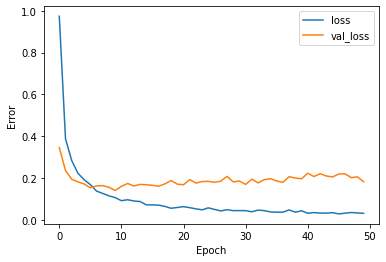

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show() 

In [11]:
loss, accuracy = model_mnist.evaluate(x_test,y_test,verbose=0)
print(f'loss: {loss}, acc: {accuracy}')

loss: 0.2581093907356262, acc: 0.9567999839782715


In [12]:
y_pred = model_mnist.predict(x_test)

157/157 [==============================] - 0s 999us/step


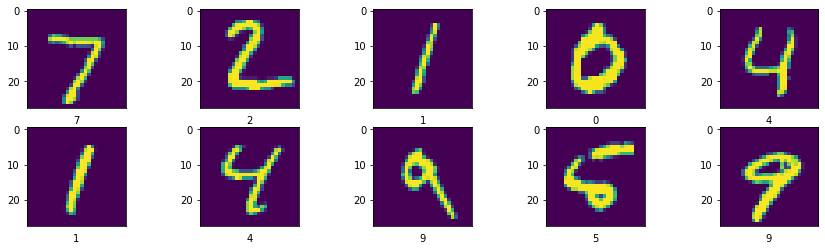

In [13]:
plt.figure(figsize=(15,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.xlabel(np.argmax(y_pred[i]))